In [137]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
print(len(data.index))
# Retirer les lignes comportant des données manquantes
data = data.dropna()
print(len(data.index))
# Retirer les sujets contrôles
data[data.CONTROL != 1]
print(len(data.index))

features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
#features_cols = ['AUDITTT', 'STAIYTT']

X = data.loc[:, features_cols]
y = data['CIMDX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model_linear = svm.SVC(kernel='linear')
model_rbf = svm.SVC(kernel='rbf')
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_boosting = GradientBoostingClassifier()
model_nb = MultinomialNB()
model_knn = KNeighborsClassifier()

# Définir les hyperparamètres
hyperparams_logistic = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_linear = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_rbf = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000], 'gamma':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_tree = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}
hyperparams_forest = {'n_estimators':[5, 10], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}
hyperparams_boosting = {'learning_rate':[0.1, 0.2, 0.4, 0.8], \
                      'n_estimators':[5, 10], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}
hyperparams_nb = {'var_smoothing':[1e-8, 1e-9, 1e-10]}
hyperparams_knn = {'n_neighbors':[1, 2, 4, 8, 16], 'weights':['uniform', 'distance']}


cv_folds = StratifiedKFold(n_splits=3, random_state=42)
scoring = make_scorer(f1_score , average='weighted')

cv_valid = GridSearchCV(estimator=model_logistic, param_grid=hyperparams_linear, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nlogistic')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_linear, param_grid=hyperparams_linear, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nSVC_linear')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_rbf, param_grid=hyperparams_rbf, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nSVC_rbf')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_tree, param_grid=hyperparams_tree, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\ntree')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_forest, param_grid=hyperparams_forest, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nforest')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_boosting, param_grid=hyperparams_boosting, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nboosting')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_nb, param_grid=hyperparams_nb, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nnaive bayes')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_knn, param_grid=hyperparams_knn, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nknn')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

print("\n\n Analyse terminée")

633
372
372
Data ready

logistic

Meilleur paramètre:  {'C': 1}

Score =  0.5459213657541867

SVC_linear

Meilleur paramètre:  {'C': 1}

Score =  0.5455896174252503

SVC_rbf

Meilleur paramètre:  {'C': 100, 'gamma': 0.01}

Score =  0.5609071371722337

tree

Meilleur paramètre:  {'max_depth': 4, 'min_samples_split': 14}

Score =  0.50256377700607

forest

Meilleur paramètre:  {'max_depth': 16, 'max_features': 9, 'min_samples_split': 6, 'n_estimators': 10}

Score =  0.5645273964342521

boosting

Meilleur paramètre:  {'learning_rate': 0.2, 'max_depth': 12, 'max_features': 3, 'min_samples_split': 12, 'n_estimators': 15}

Score =  0.6028732123946685


ValueError: Invalid parameter var_smoothing for estimator MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True). Check the list of available parameters with `estimator.get_params().keys()`.

 <img src="./img/cours_3_0.svg" alt="Drawing" style="width: 2000px;"/>

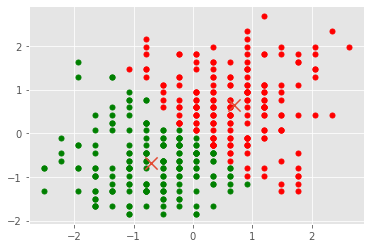

"\nprint('Data ready')\n\n# -----------------------------------------------------------------------------\n# ÉTAPE 4 : définir et entraîner le modèle\n# -----------------------------------------------------------------------------\n\nmodels = [\n    {'KM', KMeans(n_clusters=3)},\n    {'MS', MeanShift()},\n    {'AC', AgglomerativeClustering()},\n    {'DBSCAN', DBSCAN()}\n]\n\nfor name, model in models:\n    clf = model\n    print('\n\n', name)\n    print('\n', clf.fit_predict(X))\n"

In [72]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

from matplotlib import style
style.use("ggplot")

from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, DBSCAN

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------


# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
features_cols = ['STAIYTT', 'PHQ9TT']

X = data.loc[:, features_cols]

scaler = StandardScaler()

X = scaler.fit_transform(X)

#color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
#plt.scatter(X[:,0], X[:,1])
#plt.show()

KM = KMeans(n_clusters = 2)
KM.fit(X)

centroids = KM.cluster_centers_
labels = KM.labels_

#print(centroids)
#print(labels)

colors = ["g.", "r."]

for i in range(len(X)):
    #print("coordinates:",X[i], "labels:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:,0],centroids[:,1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()
 
    
"""
print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

models = [
    {'KM', KMeans(n_clusters=3)},
    {'MS', MeanShift()},
    {'AC', AgglomerativeClustering()},
    {'DBSCAN', DBSCAN()}
]

for name, model in models:
    clf = model
    print('\n\n', name)
    print('\n', clf.fit_predict(X))
"""


In [96]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
#features_cols = ['AUDITTT', 'STAIYTT']
X = data.loc[:, features_cols]

scaler = StandardScaler()

X = scaler.fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(pca.components_)
print(pca.explained_variance_)

[[ 0.39574818  0.3945421   0.37080699  0.36274023  0.41804713  0.48185334
  -0.01296216 -0.10349606 -0.02856772]
 [ 0.11896473 -0.21140391 -0.17233691  0.47948685  0.17722279 -0.18074764
  -0.4239444   0.53030629  0.39562216]]
[1.89590937 1.7129289 ]


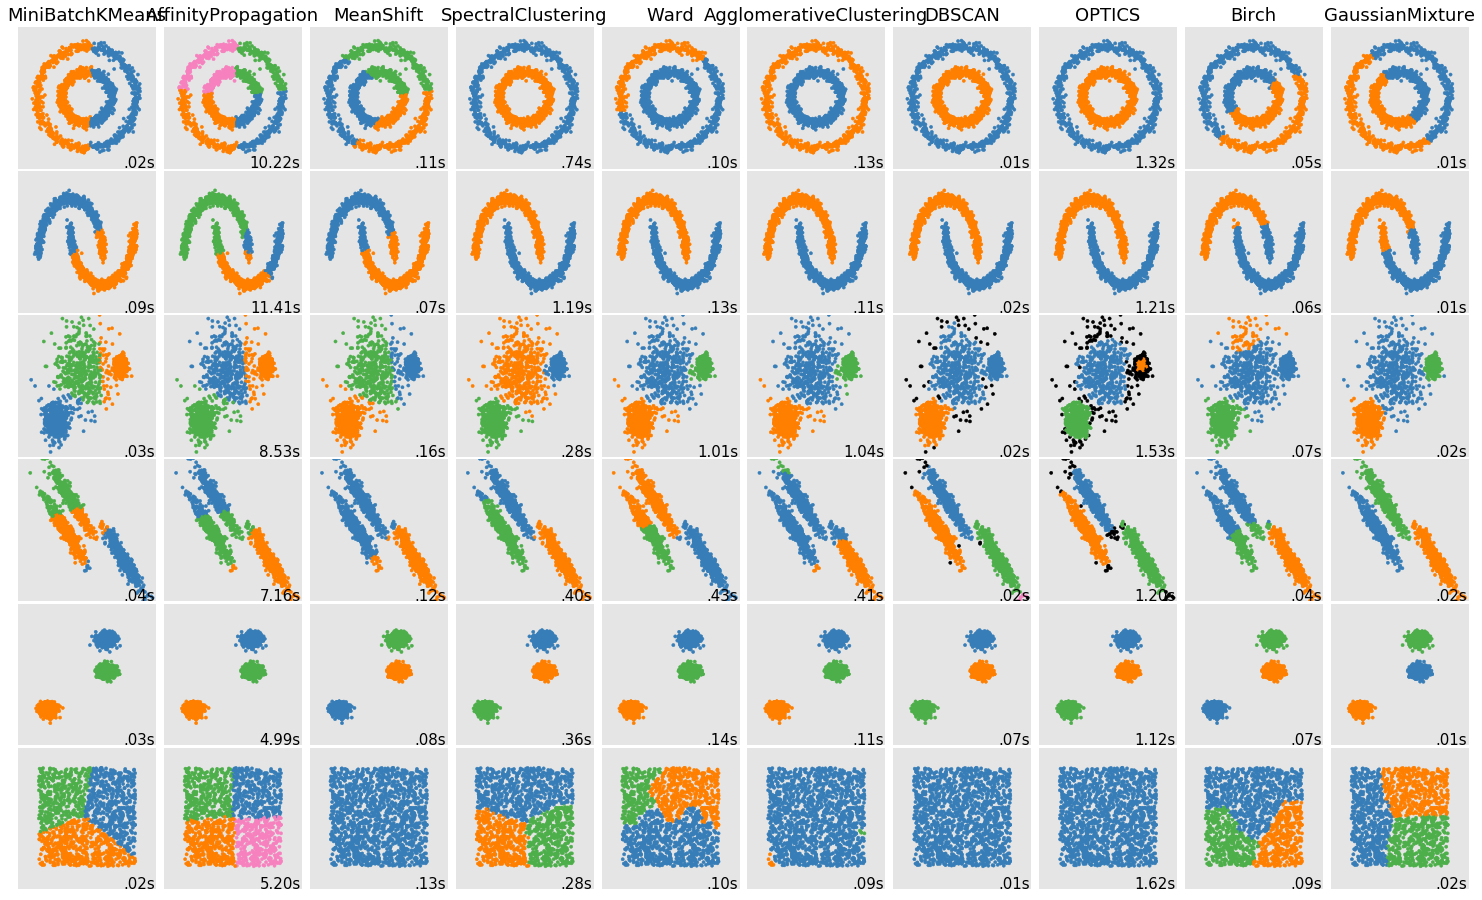

In [70]:


import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
#features_cols = ['AUDITTT', 'STAIYTT']

X = data.loc[:, features_cols]
y = data['WHODASTTB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model_logistic = LogisticRegression(solver='lbfgs')
model_linear = svm.SVC(kernel='linear')
model_rbf = svm.SVC(kernel='rbf')
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_boosting = GradientBoostingClassifier()
model_nb = GaussianNB()
model_knn = KNeighborsClassifier()

# Définir les hyperparamètres
hyperparams_logistic = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_linear = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_rbf = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000], 'gamma':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_tree = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}
hyperparams_forest = {'n_estimators':[5, 10, 15, 20], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}
hyperparams_boosting = {'learning_rate':[0.1, 0.2, 0.4, 0.8], \
                      'n_estimators':[5, 10, 15, 20], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}
hyperparams_nb = {'var_smoothing':[1e-8, 1e-9, 1e-10]}
hyperparams_knn = {'n_neighbors':[1, 2, 4, 8, 16], 'weights':['uniform', 'distance']}


cv_folds = StratifiedKFold(n_splits=5, random_state=42)

scoring='roc_auc'

"""
cv_valid = GridSearchCV(estimator=model_logistic, param_grid=hyperparams_linear, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nlogistic')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_linear, param_grid=hyperparams_linear, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nSVC_linear')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_rbf, param_grid=hyperparams_rbf, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nSVC_rbf')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_tree, param_grid=hyperparams_tree, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\ntree')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_forest, param_grid=hyperparams_forest, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nforest')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_boosting, param_grid=hyperparams_boosting, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nboosting')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_nb, param_grid=hyperparams_nb, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nnaive bayes')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)
"""
cv_valid = GridSearchCV(estimator=model_knn, param_grid=hyperparams_knn, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nknn')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)


In [ ]:
# On spécifie l'algorithme final.
#model_final = LogisticRegression(solver='lbfgs')
#model_final = svm.SVC(kernel='linear', C=0.0001) 
#model_final = svm.SVC(kernel='rbf', C=0.1, gamma=0.1) 
#model_final = DecisionTreeClassifier(max_depth=4, min_samples_split=2)
#model_final = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=2, max_features=3)
#model_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, max_depth=4, min_samples_split=12, max_features=7)
#model_final = GaussianNB(var_smoothing=1e-8)
model_final = KNeighborsClassifier(n_neighbors=1, weights='uniform')


# On entrapine l'algorithme final.
model_final.fit(X_train, y_train)

# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model_final.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)